In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
#from netCDF4 import Dataset
import pandas as pd
import netCDF4

#from cartopy import config
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#from cartopy.util import add_cyclic_point

from mpl_toolkits.axes_grid1 import ImageGrid

In [22]:
figfolder = './figures/'

dataset = 'MERRA2'
ver_er = 'ta'
ver_mr = 'T'

ver3 = 'T'
ver4 = 'QV'

unit = 'K'

plev = 'level'
plevIndexer = 'level'

LatIndexer, LonIndexer = 'latitude', 'longitude'
lat = 'latitude'
lon = 'longitude'

dri = '/lss/research/agon-lab/ERA5_ITCZ_Subdaily/normalized_ctp_files/monthly_avg/'
fn = 'ERA5_normalized_ctp_cu_t_2007_2016_2.5deg_composited_monthly_avg.nc'
data_era_ta = xr.open_dataset(dri+fn)

fn = 'ERA5_normalized_ctp_cu_dTa_dp_2007_2016_2.5deg_composited_monthly_avg.nc'
data_era_dt_dp = xr.open_dataset(dri+fn)

fn = 'ERA5_normalized_ctp_cu_w_2007_2016_2.5deg_composited_monthly_avg.nc'
data_era_om = xr.open_dataset(dri+fn)

fn = 'ERA5_normalized_ctp_cu_q_2007_2016_2.5deg_composited_monthly_avg.nc'
data_era_sh = xr.open_dataset(dri+fn)

fn = 'ERA5_normalized_ctp_cu_clwc_2007_2016_2.5deg_composited_monthly_avg.nc'
data_era_clwc = xr.open_dataset(dri+fn)

fn = 'ERA5_normalized_ctp_cu_qs_2007_2016_2.5deg_composited_monthly_avg.nc'
data_era_qs = xr.open_dataset(dri+fn)
#------------------------------------------------------------------------

dri = '/lss/research/agon-lab/MERRA2_3hrly/normalized_ctp/monthly_avg/'
fn  = 'MERRA2_normalized_ctp_cu_T_2007_2016_2.5deg_composited_monthly_avg.nc'
data_merra_ta = xr.open_dataset(dri+fn)

fn = 'MERRA2_normalized_ctp_cu_dTa_dp_2007_2016_2.5deg_composited_monthly_avg.nc'
data_merra_dt_dp = xr.open_dataset(dri+fn) 

fn = 'MERRA2_normalized_ctp_cu_w_2007_2016_2.5deg_composited_monthly_avg.nc'
data_merra_om = xr.open_dataset(dri+fn)

fn = 'MERRA2_normalized_ctp_cu_QV_2007_2016_2.5deg_composited_monthly_avg.nc'
data_merra_sh = xr.open_dataset(dri+fn)

fn = 'MERRA2_normalized_ctp_cu_QL_2007_2016_2.5deg_composited_monthly_avg.nc'
data_merra_clwc = xr.open_dataset(dri+fn)



fn = 'MERRA2_normalized_ctp_cu_qs_2007_2016_2.5deg_composited_monthly_avg.nc'
data_merra_qs = xr.open_dataset(dri+fn)




In [4]:
lats = -15
latn = 0 #0
lonw = 240
lone = 280



lev0 = 700
lev1 = 1000

yr0 = 2007
yrf = 2016

In [5]:
era_ta = data_era_ta['t'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(lev1,lev0)}]
era_dt_dp = data_era_dt_dp['dTa_dp'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(lev1,lev0)}]
era_om = data_era_om['w'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(lev1,lev0)}]
era_sh = data_era_sh['q'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(lev1,lev0)}]
era_clwc = data_era_clwc['clwc'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(lev1,lev0)}]
era_qs = data_era_qs['qs'][:,:,:,::-1].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(lev1,lev0)}]



In [7]:
merra_ta= data_merra_ta['T'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(lev1,lev0)}]
merra_dt_dp= data_merra_dt_dp['dTa_dp'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(lev1,lev0)}]
merra_om= data_merra_om['w'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(lev1,lev0)}]
merra_sh= data_merra_sh['QV'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(lev1,lev0)}]
merra_clwc= data_merra_clwc['QL'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(lev1,lev0)}]
merra_qs= data_merra_qs['qs'][:,:,:,::-1].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(lev1,lev0)}]

In [8]:
qs_new = merra_qs.interp(level=(era_qs['level']))

In [9]:
lev = era_ta[''+plev+'']

In [10]:
time_mar= era_ta['month']

In [11]:
# land-sea mask
fn_lsm = '/lss/research/agon-lab/ERA5_ITCZ_daily/lsm_era5.nc'# load the land-sea mask here and do a where statement further down   
data_lsm = xr.open_dataset(fn_lsm)
lsm = data_lsm['lsm'][0,::-10,::10].sel(latitude=slice(lats,latn),longitude=slice(lonw,lone))

In [13]:
era_ta_yz = era_ta.where(lsm==0).mean(dim=('latitude','longitude')) 
era_om_yz = era_om.where(lsm==0).mean(dim=('latitude','longitude'))*(86400/100)
era_sh_yz = era_sh.where(lsm==0).mean(dim=('latitude','longitude'))
era_dt_dp_yz = era_dt_dp.where(lsm==0).mean(dim=('latitude','longitude'))
era_clwc_yz = era_clwc.where(lsm==0).mean(dim=('latitude','longitude'))
era_qs_yz = era_qs.where(lsm==0).mean(dim=('latitude','longitude'))

In [14]:
merra_ta_yz = merra_ta.where(lsm==0).mean(dim=('latitude','longitude'))
merra_om_yz = merra_om.where(lsm==0).mean(dim=('latitude','longitude'))*(86400/100)
merra_dt_dp_yz = merra_dt_dp.where(lsm==0).mean(dim=('latitude','longitude'))
merra_sh_yz = merra_sh.where(lsm==0).mean(dim=('latitude','longitude'))
merra_clwc_yz = merra_clwc.where(lsm==0).mean(dim=('latitude','longitude'))
merra_qs_yz = qs_new.where(lsm==0).mean(dim=('latitude','longitude'))

In [15]:
mon_era_ta = era_ta_yz[2,:]
mon_era_om = era_om_yz[2,:]
mon_era_sh = era_sh_yz[2,:]*(1000)
mon_era_clwc = era_clwc_yz[2,:]*(1000)
mon_era_dt_dp = era_dt_dp_yz[2,:]
mon_era_qs = era_qs_yz[2,:]*(1000)

In [16]:
mon_merra_ta = merra_ta_yz[2,:]
mon_merra_om = merra_om_yz[2,:]
mon_merra_sh = merra_sh_yz[2,:]*(1000)
mon_merra_clwc = merra_clwc_yz[2,:]*(1000)
mon_merra_qs = merra_qs_yz[2,:]*(1000)
mon_merra_dt_dp = merra_dt_dp_yz[2,:]

In [17]:
lev = mon_era_ta['level']

In [18]:
Month = "Mar"

In [19]:
dri = '/lss/research/agon-lab/ERA5_ITCZ_Subdaily/'
fn = 'ERA5_plev_to_alt.nc'
data_era_alt = xr.open_dataset(dri+fn)
data_era_alt_subset = data_era_alt.sel(latitude = slice(lats,latn), longitude = slice(lonw,lone), alt = slice(3.01,0.11)).mean(dim =('time', 'latitude', 'longitude'))

In [20]:
alt = data_era_alt_subset['alt']
alt[:-1].min()

<xarray.DataArray 'alt' ()> Size: 8B
array(0.32)

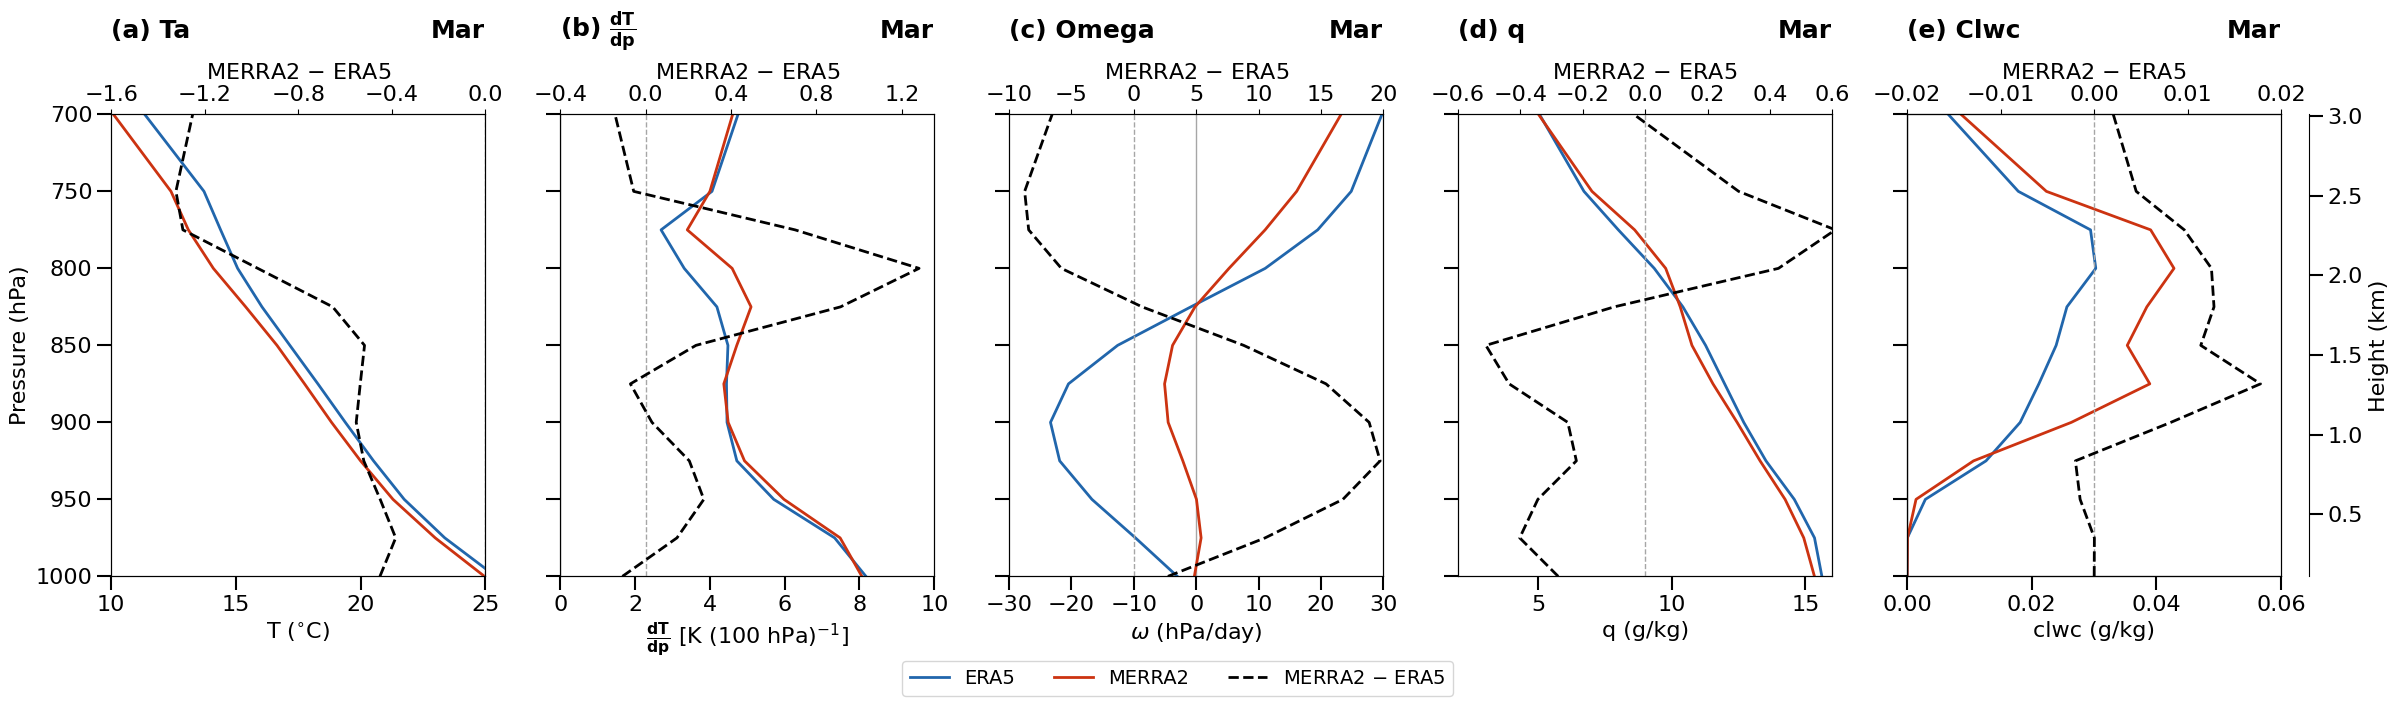

In [23]:
fs = 16

npan = 5
props = dict(boxstyle='square', facecolor='white', alpha=0.8)

fig = plt.figure(figsize=(28, 6))#, tight_layout=True)
for j in range(0,npan,1):
    ax = fig.add_subplot(1,npan,j+1)
    ax.tick_params(axis='both', which='major', length=10, width=1.5, direction='out', labelsize=16)#, right='True', top='True')
    if j == 0:
        twin1 = ax.twiny()
        p1, = ax.plot(mon_era_ta.values-272.15,lev,label = 'ERA5',color="#2166AC", linewidth = 2)
        p2, = ax.plot(mon_merra_ta.values-272.15,lev,label = 'MERRA2',color="#CC3311", linewidth = 2)
        p3, = twin1.plot((mon_merra_ta.values-mon_era_ta.values),lev,color= 'black',label = 'MERRA2-ERA5', linestyle = '--', linewidth = 2)
        plt.gca().invert_yaxis()
        #ax.legend(handles=[p1, p2,p3], loc ='upper right')

        ax.set_ylim((1000,700))
        ax.set_xlim(10,25)
        plt.xlim(-1.6, 0)
        plt.xticks(np.arange(-1.6, 0.4, .4))
        plt.axvline(0, color='0.65', linewidth = 1.0, zorder=-1, linestyle = '--')
        ax.axvline(0, color='0.65', linewidth = 1.0, zorder=-1)
        #plt.axhline(850, color='0.65', linewidth = 2.0, zorder=-1)
        plt.title(''+Month+'', fontsize=18, fontweight = 'bold',loc='right', pad = 18)
        #plt.title('$\omega$ during Cu days', fontsize=16,loc='left')
        plt.title('(a) Ta', fontsize=18, fontweight = 'bold',loc='left', pad = 18)
        ax.set_ylabel('Pressure (hPa)',fontsize=fs)
        ax.set_xlabel('T ($^{\circ}$C)', fontsize=fs)

        plt.xlabel('MERRA2 $\minus$ ERA5', fontsize=fs)
        plt.xticks(fontsize =fs)
        plt.yticks(fontsize =fs)
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)
        ax.tick_params(axis='both', which='major', length=10, width=1.5, direction='out', labelsize=fs)

       

    if j == 1:
        twin1 = ax.twiny()
        p1, = ax.plot(mon_era_dt_dp,lev,label = 'ERA5',color="#2166AC", linewidth = 2)
        p2, = ax.plot(mon_merra_dt_dp,lev,label = 'MERRA2',color="#CC3311", linewidth = 2)
        p3, = twin1.plot((mon_merra_dt_dp-mon_era_dt_dp),lev,color= 'black',label = 'MERRA2-ERA5', linestyle = '--', linewidth = 2)
        plt.gca().invert_yaxis()
        #ax.legend(handles=[p1, p2,p3], loc ='upper right')

        ax.set_ylim(1000,700)
        ax.set_xlim(0,10)
        plt.xticks(np.arange(-.4,1.4, .4),fontsize =fs)
        plt.axvline(0, color='0.65', linewidth = 1.0, zorder=-1, linestyle = '--')
        ax.axvline(0, color='0.65', linewidth = 1.0, zorder=-1)
        #plt.axhline(850, color='0.65', linewidth = 2.0, zorder=-1)
        plt.title(''+Month+'', fontsize=18, fontweight = 'bold',loc='right', pad = 18)
        #plt.title('$\omega$ during Cu days', fontsize=16,loc='left')
        plt.title(r'(b) $\mathbf{ \frac {d{T}}{dp}}$', fontsize=18, fontweight = 'bold',loc='left', pad = 18)
        #ax.set_ylabel('Pressure (hPa)',fontsize=10)
        ax.set_xlabel (r'$\mathbf{ \frac {d{T}}{dp}}$ [K (100 hPa)$^{-1}$]',fontsize=fs)

        plt.xlabel('MERRA2 $\minus$ ERA5', fontsize=fs)
        plt.xticks(fontsize =fs)
        plt.yticks(fontsize =fs)
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)
        ax.tick_params('y', labelleft=False)



    if j == 2:
        twin1 = ax.twiny()
        p1, = ax.plot(mon_era_om.values,lev,label = 'ERA5',color="#2166AC", linewidth = 2)
        p2, = ax.plot(mon_merra_om.values,lev,label = 'MERRA2',color="#CC3311", linewidth = 2)
        p3, = twin1.plot((mon_merra_om.values-mon_era_om.values),lev,color= 'black',label = 'MERRA2-ERA5', linestyle = '--', linewidth = 2)
        plt.gca().invert_yaxis()
        #ax.legend(handles=[p1, p2,p3], loc ='upper right')

        ax.set_ylim(1000,700)
        #ax.set_xlim(0,40)
        ax.set_xlim(-30,30)
        ax.set_xticks(np.arange(-30,40, 10))#,fontsize =fs)
        plt.xlim(-10,20)
        plt.axvline(0, color='0.65', linewidth = 1.0, zorder=-1, linestyle = '--')
        ax.axvline(0, color='0.65', linewidth = 1.0, zorder=-1)
        #plt.axhline(850, color='0.65', linewidth = 2.0, zorder=-1)
        plt.title(''+Month+'', fontsize=18, fontweight = 'bold',loc='right', pad = 18)
        #plt.title('$\omega$ during Cu days', fontsize=16,loc='left')
        plt.title('(c) Omega', fontsize=18, fontweight = 'bold',loc='left', pad = 18)
        #ax.set_ylabel('Pressure (hPa)',fontsize=10)
        ax.set_xlabel('$\omega$ (hPa/day)', fontsize=fs)

        plt.xlabel('MERRA2 $\minus$ ERA5', fontsize=fs)
        plt.xticks(fontsize =fs)
        plt.yticks(fontsize =fs)
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)
        ax.tick_params('y', labelleft=False)



    if j == 3:
        twin1 = ax.twiny()
        p1, = ax.plot(mon_era_sh.values,lev,label = 'ERA5',color="#2166AC", linewidth = 2)
        p2, = ax.plot(mon_merra_sh.values,lev,label = 'MERRA2',color="#CC3311", linewidth = 2)
        p3, = twin1.plot((mon_merra_sh.values-mon_era_sh.values),lev,color= 'black',label = 'MERRA2-ERA5', linestyle = '--', linewidth = 2)
        plt.gca().invert_yaxis()
        #ax.legend(handles=[p1, p2,p3], loc ='upper right')
        ax.set_xlim(2,16)
        #ax.set_xticks(np.arange(4,16, 4),fontsize =fs)
        plt.xlim(-.6,.6)
        plt.xticks(np.arange(-.6, .8 , .2))
        ax.set_ylim(1000,700)
        plt.axvline(0, color='0.65', linewidth = 1.0, zorder=-1, linestyle = '--')
        ax.axvline(0, color='0.65', linewidth = 1.0, zorder=-1)
        #plt.axhline(850, color='0.65', linewidth = 2.0, zorder=-1)
        plt.title(''+Month+'', fontsize=18, fontweight = 'bold',loc='right', pad = 18)
        #plt.title('$\omega$ during Cu days', fontsize=16,loc='left')
        plt.title('(d) q', fontsize=18, fontweight = 'bold',loc='left', pad = 18)
        #ax.set_ylabel('Pressure (hPa)',fontsize=10)
        ax.set_xlabel('q (g/kg)', fontsize=fs)

        plt.xlabel('MERRA2 $\minus$ ERA5', fontsize=fs)
        plt.xticks(fontsize =fs)
        plt.yticks(fontsize =fs)
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)
        ax.tick_params('y', labelleft=False)


    if j == 4:
        twina = ax.twinx()
        twin1 = ax.twiny()
        p1, = ax.plot(mon_era_clwc.values,lev,label = 'ERA5',color="#2166AC", linewidth = 2)
        p2, = ax.plot(mon_merra_clwc.values,lev,label = 'MERRA2',color="#CC3311", linewidth = 2)
        p3, = twin1.plot((mon_merra_clwc.values-mon_era_clwc.values),lev,color= 'black',label = 'MERRA2 $\minus$ ERA5', linestyle = '--', linewidth = 2)
        plt.gca().invert_yaxis()
        #ax.legend(handles=[p1, p2,p3])
        ax.set_xlim(0,.06)
        #plt.xlim(0,0.03)
        plt.xlim(-0.02, 0.02)
        plt.xticks(np.arange(-0.02, 0.03 , .01))
        ax.set_ylim(1000,700)
        plt.axvline(0, color='0.65', linewidth = 1.0, zorder=-1, linestyle = '--')
        ax.axvline(0, color='0.65', linewidth = 1.0, zorder=-1)
        #plt.axhline(850, color='0.65', linewidth = 2.0, zorder=-1)
        plt.title(''+Month+'', fontsize=18, fontweight = 'bold',loc='right', pad = 18)
        plt.title('(e) Clwc', fontsize=18, fontweight = 'bold',loc='left', pad = 18)
        #ax.set_ylabel('Pressure (hPa)',fontsize=10)
        ax.set_xlabel('clwc (g/kg)', fontsize=fs)

        plt.xlabel('MERRA2 $\minus$ ERA5', fontsize=fs)
        plt.xticks(fontsize =fs)
        plt.yticks(fontsize =fs)
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)
        ax.tick_params('y', labelleft=False)
        twina.set_ylim(alt.min(), alt.max())
        twina.tick_params(axis='y', labelsize=fs)
        twina.spines['right'].set_position(('outward', 20))
        twina.set_ylabel("Height (km)",fontsize = fs)
        #plt.gca().invert_yaxis()
        ax.tick_params('y', labelleft=False)
        twina.tick_params(axis='both', which='major', length=10, width=1.5, direction='out', labelsize=16)   
#plt.legend(handles=[p1, p2, p3],loc='lower center', ncol=3,fontsize=14,bbox_to_anchor=(0.,-.28, -5, 4.5))
        #twina.tick_params(axis='both', which='major', length=10, width=1.5, direction='out', labelsize=16)


    if j == 5:
        twina = ax.twinx()
        twin1 = ax.twiny()
        p1, = ax.plot(mon_era_qs.values,lev,label = 'ERA5',color="#2166AC", linewidth = 2)
        p2, = ax.plot(mon_merra_qs.values,lev,label = 'MERRA2',color="#CC3311", linewidth = 2)
        p3, = twin1.plot((mon_merra_qs.values-mon_era_qs.values),lev,color= 'black',label = 'MERRA2 $\minus$ ERA5', linestyle = '--', linewidth = 2)
        plt.gca().invert_yaxis()
        #ax.legend(handles=[p1, p2,p3])
        #ax.set_xlim(0,.06)
        #plt.xlim(0,0.03)
        #plt.xlim(-0.02, 0.02)
        #plt.xticks(np.arange(-0.02, 0.03 , .01))
        twin1.set(xlim = (0.09,0.13))

        ax.set_xlim(13,21)
        ax.set_xticks(np.arange(13, 23, 2))
        ax.set_ylim(1000,700)
        plt.axvline(0, color='0.65', linewidth = 1.0, zorder=-1, linestyle = '--')
        ax.axvline(0, color='0.65', linewidth = 1.0, zorder=-1)
        #plt.axhline(850, color='0.65', linewidth = 2.0, zorder=-1)
        plt.title(''+Month+'', fontsize=18, fontweight = 'bold',loc='right', pad = 18)
        plt.title('(f) qs', fontsize=18, fontweight = 'bold',loc='left', pad = 18)
        #ax.set_ylabel('Pressure (hPa)',fontsize=10)
        ax.set_xlabel('qs (g/kg)', fontsize=fs)

        plt.xlabel('MERRA2 $\minus$ ERA5', fontsize=fs)
        plt.xticks(fontsize =fs)
        plt.yticks(fontsize =fs)
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)
        twina.set_ylim(alt.min(), alt.max())
        twina.tick_params(axis='y', labelsize=fs)
        twina.spines['right'].set_position(('outward', 20))
        twina.set_ylabel("Height (km)",fontsize = fs)
        #plt.gca().invert_yaxis()
        ax.tick_params('y', labelleft=False)
        twina.tick_params(axis='both', which='major', length=10, width=1.5, direction='out', labelsize=16)   
plt.legend(handles=[p1, p2, p3],loc='lower center', ncol=3,fontsize=14,bbox_to_anchor=(0.,-.28, -3.9, 4.5))

plt.savefig(figfolder+Month+'_normalized_ctp_SH(15S-EQ)_thermodynamic_'+str(yr0)+'-'+str(yrf)+'.pdf' ,bbox_inches="tight",transparent=False)